#### In this project a CNN model has been built in Keras and trained on CIFAR-10 data set 



Here is a BaseLine
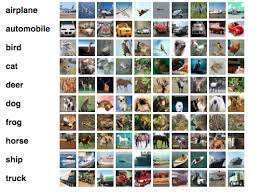

## Import Libraries

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
# from keras.constraints import maxnorm
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt

2024-02-24 18:51:50.655709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 18:51:50.655813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 18:51:50.814645: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load Data 

In [2]:
(x_train, y_train), (x_test, y_test ) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

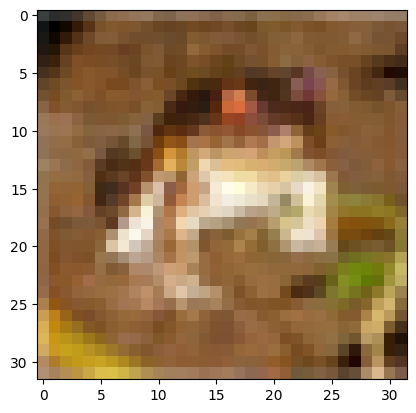

In [5]:
plt.imshow(x_train[0])
plt.show()

In [6]:
y_test[0]

array([3], dtype=uint8)

### Pre-processing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [10]:
x_test[0]

array([[[0.61960787, 0.4392157 , 0.19215687],
        [0.62352943, 0.43529412, 0.18431373],
        [0.64705884, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254903, 0.14117648],
        [0.49411765, 0.35686275, 0.14117648],
        [0.45490196, 0.33333334, 0.12941177]],

       [[0.59607846, 0.4392157 , 0.2       ],
        [0.5921569 , 0.43137255, 0.15686275],
        [0.62352943, 0.44705883, 0.1764706 ],
        ...,
        [0.53333336, 0.37254903, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509805, 0.13333334]],

       [[0.5921569 , 0.43137255, 0.18431373],
        [0.5921569 , 0.42745098, 0.12941177],
        [0.61960787, 0.43529412, 0.14117648],
        ...,
        [0.54509807, 0.38431373, 0.13333334],
        [0.50980395, 0.37254903, 0.13333334],
        [0.47058824, 0.34901962, 0.12941177]],

       ...,

       [[0.26666668, 0.4862745 , 0.69411767],
        [0.16470589, 0.39215687, 0.5803922 ],
        [0.12156863, 0

In [11]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [12]:
y_train[0], y_test[0]

(array([6], dtype=uint8), array([3], dtype=uint8))

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 1. Base Model 

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape = ( 32, 32, 3), activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 32, activation = 'relu'))
model.add(keras.layers.Dense(units= 10, activation = 'softmax'))


In [15]:
model.compile(loss=tf.losses.sparse_categorical_crossentropy,  optimizer= tf.optimizers.Adam(), metrics=['accuracy'] )

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         7

## Training the Model

In [17]:
hist = model.fit(x_train, y_train, epochs=40, batch_size= 32, validation_data=(x_test, y_test))

Epoch 1/40


I0000 00:00:1708800736.055348      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 14s 6ms/step - loss: 1.5165 - accuracy: 0.4477 - val_loss: 1.2908 - val_accuracy: 0.5388
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0876 - accuracy: 0.6171 - val_loss: 1.0033 - val_accuracy: 0.6485
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8942 - accuracy: 0.6862 - val_loss: 0.8747 - val_accuracy: 0.7007
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7782 - accuracy: 0.7310 - val_loss: 0.8462 - val_accuracy: 0.7049
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6990 - accuracy: 0.7581 - val_loss: 0.8121 - val_accuracy: 0.7250
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6306 - accuracy: 0.7802 - val_loss: 0.7981 - val_accuracy: 0.7296
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5807 - accuracy: 0.7968 - val_loss: 0.7739 - val_accuracy: 0.7427
Ep

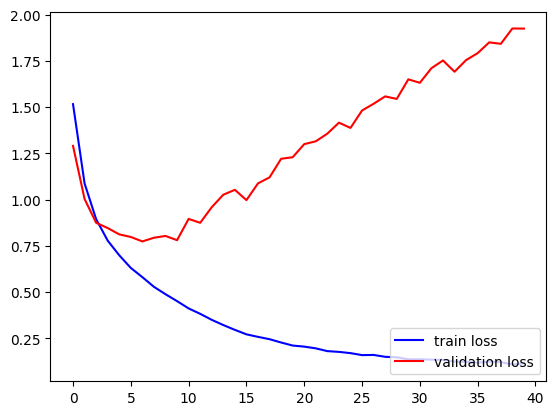

In [18]:
plt.plot(hist.history['loss'],  color= 'b',  label= 'train loss')
plt.plot(hist.history['val_loss'], color = 'r',  label = 'validation loss')
plt.legend(loc = 'lower right')

plt.show()

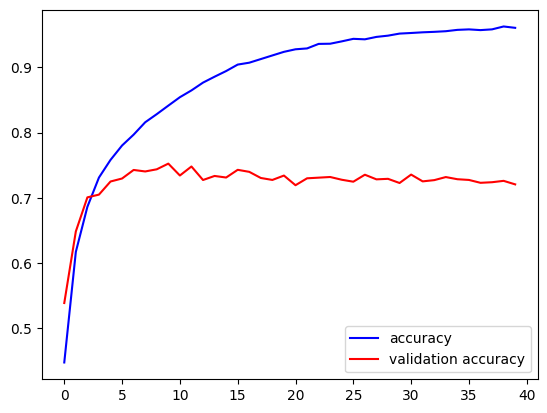

In [19]:
plt.plot(hist.history['accuracy'],  color= 'b', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'r', label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [20]:
test_los, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.9249 - accuracy: 0.7206


## 2. BatchNormalization Layer 

In [21]:
# model = keras.Sequential([ layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)), layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.MaxPool2D((2, 2)), layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.MaxPool2D((2, 2)), layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.MaxPool2D((2, 2)), layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'), layers.MaxPool2D((2, 2)), layers.Flatten(), layers.Dense(128, kernel_initializer='he_uniform', activation='relu'), # batchnormalization layers.BatchNormalization(), layers.Dense(128, kernel_initializer='he_uniform', activation='relu'), # batchnormalization layers.BatchNormalization(), layers.Dense(64, kernel_initializer='he_uniform', activation='relu'), layers.Dense(10, kernel_initializer='he_uniform', activation='softmax') ]) 

In [22]:
BN_model = keras.Sequential()
BN_model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu',padding= 'same',  input_shape = (32,32,3)))
BN_model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding= 'same' ))
BN_model.add(keras.layers.MaxPool2D())
BN_model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding= 'same' ))
BN_model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same' ))
BN_model.add(keras.layers.MaxPool2D())
BN_model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu',  padding ='same'))
BN_model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding ='same' ))
BN_model.add(keras.layers.MaxPool2D())
BN_model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding ='same' ))
BN_model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding ='same' ))
BN_model.add(keras.layers.MaxPool2D())

BN_model.add(keras.layers.Flatten())
BN_model.add(keras.layers.Dense(128, activation = 'relu'))
BN_model.add(keras.layers.BatchNormalization())
BN_model.add(keras.layers.Dense(128, activation = 'relu'))
BN_model.add(keras.layers.BatchNormalization())
BN_model.add(keras.layers.Dense(128, activation = 'relu'))
BN_model.add(keras.layers.BatchNormalization())
BN_model.add(keras.layers.Dense(64, activation = 'relu'))
BN_model.add(keras.layers.Dense(10, activation = 'softmax'))

In [23]:
BN_model.compile(loss=tf.losses.sparse_categorical_crossentropy,  optimizer= tf.optimizers.Adam(), metrics=['accuracy'] )

In [24]:
BN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [25]:
BN_hist = BN_model.fit(x_train, y_train, epochs=40 , batch_size= 32, validation_data = (x_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 23s 10ms/step - loss: 1.7791 - accuracy: 0.3343 - val_loss: 2.4756 - val_accuracy: 0.2009
Epoch 2/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2969 - accuracy: 0.5303 - val_loss: 1.4731 - val_accuracy: 0.4961
Epoch 3/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0474 - accuracy: 0.6251 - val_loss: 0.9635 - val_accuracy: 0.6590
Epoch 4/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9010 - accuracy: 0.6777 - val_loss: 1.2713 - val_accuracy: 0.5970
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8008 - accuracy: 0.7149 - val_loss: 0.7601 - val_accuracy: 0.7376
Epoch 6/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7142 - accuracy: 0.7493 - val_loss: 0.9173 - val_accuracy: 0.6999
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6492 - accuracy: 0.7732 - val_loss: 0.7833 - val_a

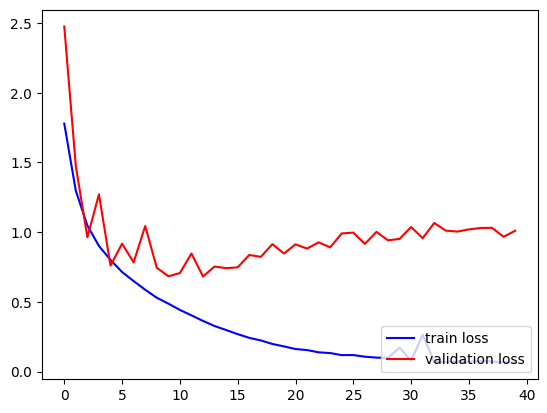

In [26]:
plt.plot(BN_hist.history['loss'],  color= 'b',  label= 'train loss')
plt.plot(BN_hist.history['val_loss'], color = 'r',  label = 'validation loss')
plt.legend(loc = 'lower right')

plt.show()

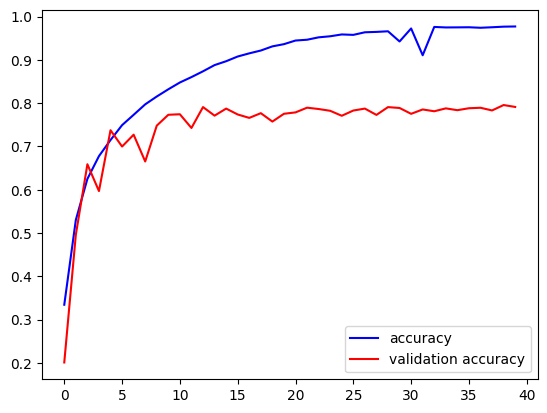

In [27]:
plt.plot(BN_hist.history['accuracy'],  color= 'b', label = 'accuracy')
plt.plot(BN_hist.history['val_accuracy'], color = 'r', label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [28]:
BN_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0102 - accuracy: 0.7914


[1.0102300643920898, 0.7914000153541565]

## 3. Dropout Layer 

In [29]:
DO_model = keras.Sequential()
DO_model.add(keras.layers.Conv2D(32,  (3,3),  padding = 'same', activation= 'relu',  input_shape= (32, 32, 3)))
DO_model.add(keras.layers.Conv2D(32, (3, 3), padding = 'same', activation= 'relu'))
DO_model.add(keras.layers.MaxPool2D())
DO_model.add(keras.layers.Dropout(0.25))

DO_model.add(keras.layers.Conv2D(64,  (3,3),  padding = 'same', activation= 'relu', ))
DO_model.add(keras.layers.Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
DO_model.add(keras.layers.MaxPool2D())
DO_model.add(keras.layers.Dropout(0.25))

DO_model.add(keras.layers.Conv2D(64,  (3,3),  padding = 'same', activation= 'relu', ))
DO_model.add(keras.layers.Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
DO_model.add(keras.layers.MaxPool2D())
DO_model.add(keras.layers.Dropout(0.25))

DO_model.add(keras.layers.Conv2D(128,  (3,3),  padding = 'same', activation= 'relu', ))
DO_model.add(keras.layers.Conv2D(128, (3, 3), padding = 'same', activation= 'relu'))
DO_model.add(keras.layers.MaxPool2D())
DO_model.add(keras.layers.Dropout(0.25))

DO_model.add(keras.layers.Flatten())
DO_model.add(keras.layers.Dense(128, activation = 'relu'))
DO_model.add(keras.layers.BatchNormalization())
DO_model.add(keras.layers.Dense(128, activation = 'relu'))
DO_model.add(keras.layers.BatchNormalization())
DO_model.add(keras.layers.Dense(64, activation = 'relu'))
DO_model.add(keras.layers.Dropout(0.25))
DO_model.add(keras.layers.Dense(10, activation = 'softmax'))


In [30]:
DO_model.compile(loss=tf.losses.sparse_categorical_crossentropy,  optimizer= tf.optimizers.Adam(), metrics=['accuracy'] )

In [31]:
DO_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [32]:
DO_hist = DO_model.fit(x_train, y_train, epochs=40 , batch_size= 32, validation_data = (x_test, y_test))

Epoch 1/40


2024-02-24 19:07:45.146769: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 20s 10ms/step - loss: 1.9257 - accuracy: 0.2719 - val_loss: 1.7196 - val_accuracy: 0.3501
Epoch 2/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5177 - accuracy: 0.4396 - val_loss: 1.3317 - val_accuracy: 0.5153
Epoch 3/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2966 - accuracy: 0.5348 - val_loss: 1.1333 - val_accuracy: 0.5876
Epoch 4/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1524 - accuracy: 0.5928 - val_loss: 2.4207 - val_accuracy: 0.3145
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0631 - accuracy: 0.6242 - val_loss: 0.9501 - val_accuracy: 0.6551
Epoch 6/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9594 - accuracy: 0.6651 - val_loss: 0.9135 - val_accuracy: 0.6819
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9039 - accuracy: 0.6864 - val_loss: 0.7718 - val_accuracy: 0.

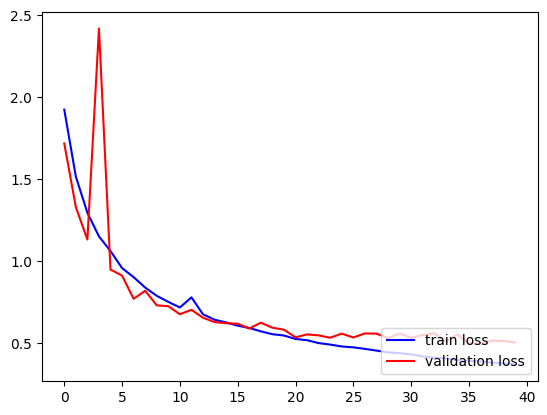

In [33]:
plt.plot(DO_hist.history['loss'],  color= 'b',  label= 'train loss')
plt.plot(DO_hist.history['val_loss'], color = 'r',  label = 'validation loss')
plt.legend(loc = 'lower right')

plt.show()

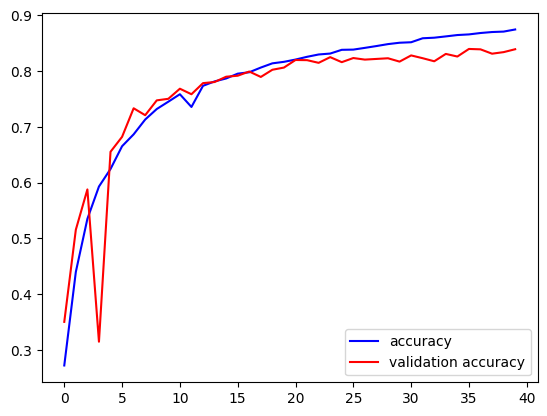

In [34]:
plt.plot(DO_hist.history['accuracy'],  color= 'b', label = 'accuracy')
plt.plot(DO_hist.history['val_accuracy'], color = 'r', label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [35]:
test_los, test_accuracy = DO_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5059 - accuracy: 0.8390


### 4. Optimizer

In the realm of deep learning, we encounter the concept of loss, which serves as an indicator of the current performance of our model. The objective now is to utilize this loss to refine our network's capabilities for improved performance. Fundamentally, our task is to minimize this loss, as a lower loss signifies enhanced model performance. This process of minimizing (or maximizing) any mathematical expression is termed optimization.

Optimizers represent algorithms or techniques designed to adjust the attributes of a neural network, such as weights and learning rate, in order to diminish losses. They are instrumental in addressing optimization problems by minimizing the function.

Optimizers can be instantiated prior to passing them to model.compile(), or alternatively, they can be passed using their string identifier. In the latter scenario, default parameters for the optimizer are employed.


*Available optimizers*
- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

## Stochastic Gradient Descent (SGD)
SGD algorithm is an extension of the Gradient Descent and it overcomes some of the disadvantages of the GD algorithm. Gradient Descent has a disadvantage that it requires a lot of memory to load the entire dataset of n-points at a time to compute the derivative of the loss function.**In the SGD algorithm derivative is computed taking one point at a time.**



θ = θ − α⋅∂(J(θ;x(i),y(i)))/∂θ


[More Details](https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html)


![](https://static.wixstatic.com/media/3eee0b_2f20c4c9902844718350e189e57fd909~mv2.png/v1/fill/w_740,h_290,al_c,q_90,usm_0.66_1.00_0.01/3eee0b_2f20c4c9902844718350e189e57fd909~mv2.webp)

In [36]:
DO_model.compile(optimizer='SGD', loss = tf.losses.sparse_categorical_crossentropy,  metrics =['accuracy'])



In [37]:
DO_hist1 = DO_model.fit(x_train, y_train, epochs=40 , batch_size= 32, validation_data = (x_test, y_test))

Epoch 1/40


2024-02-24 19:17:58.775801: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 17s 9ms/step - loss: 0.3234 - accuracy: 0.8906 - val_loss: 0.5035 - val_accuracy: 0.8394
Epoch 2/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3044 - accuracy: 0.8959 - val_loss: 0.4959 - val_accuracy: 0.8434
Epoch 3/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2944 - accuracy: 0.8990 - val_loss: 0.5046 - val_accuracy: 0.8441
Epoch 4/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2957 - accuracy: 0.8979 - val_loss: 0.4949 - val_accuracy: 0.8460
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2909 - accuracy: 0.8992 - val_loss: 0.5013 - val_accuracy: 0.8453
Epoch 6/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2892 - accuracy: 0.9006 - val_loss: 0.4935 - val_accuracy: 0.8459
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2838 - accuracy: 0.9023 - val_loss: 0.5044 - val_accuracy: 0.8

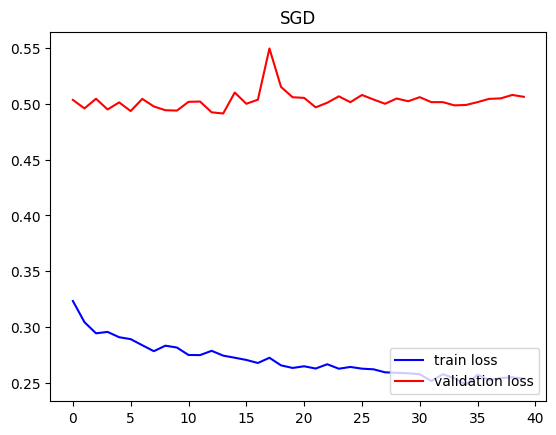

In [38]:
plt.plot(DO_hist1.history['loss'],  color= 'b',  label= 'train loss')
plt.plot(DO_hist1.history['val_loss'], color = 'r',  label = 'validation loss')
plt.legend(loc = 'lower right')
plt.title('SGD')

plt.show()

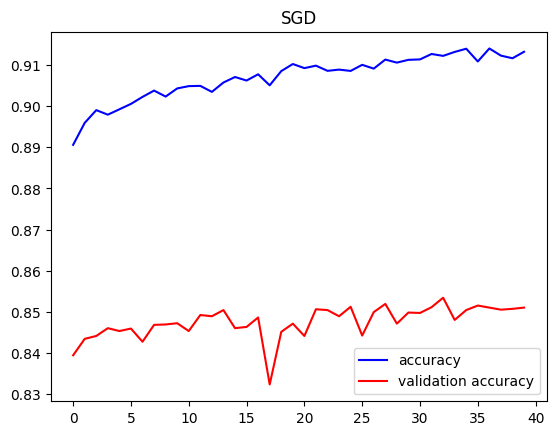

In [39]:
plt.plot(DO_hist1.history['accuracy'],  color= 'b', label = 'accuracy')
plt.plot(DO_hist1.history['val_accuracy'], color = 'r', label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.title('SGD')
plt.show()

## RMSprop
RMSprop in fact is identical to the first update vector of Adadelta that we derived above:
![](https://static.wixstatic.com/media/3eee0b_31813f3012f942dd898a19541290d057~mv2.png/v1/fill/w_360,h_111,al_c,lg_1,q_90/3eee0b_31813f3012f942dd898a19541290d057~mv2.webp)


RMSprop as well divides the learning rate by an exponentially decaying average of squared gradients. Hinton suggests γ be set to 0.9, while a good default value for the learning rate η is 0.001.

RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates

In [40]:
DO_model.compile(optimizer='RMSprop', loss = tf.losses.sparse_categorical_crossentropy,  metrics =['accuracy'])

In [41]:
DO_hist2 = DO_model.fit(x_train, y_train, epochs=40 , batch_size= 32, validation_data = (x_test, y_test))

Epoch 1/40


2024-02-24 19:27:56.703945: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 18s 9ms/step - loss: 0.3370 - accuracy: 0.8868 - val_loss: 0.5770 - val_accuracy: 0.8302
Epoch 2/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3476 - accuracy: 0.8833 - val_loss: 0.5416 - val_accuracy: 0.8365
Epoch 3/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3528 - accuracy: 0.8842 - val_loss: 0.6094 - val_accuracy: 0.8277
Epoch 4/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3581 - accuracy: 0.8827 - val_loss: 0.5273 - val_accuracy: 0.8375
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3498 - accuracy: 0.8832 - val_loss: 0.5200 - val_accuracy: 0.8402
Epoch 6/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3467 - accuracy: 0.8833 - val_loss: 0.5257 - val_accuracy: 0.8385
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3417 - accuracy: 0.8866 - val_loss: 0.5283 - val_accuracy: 0.8

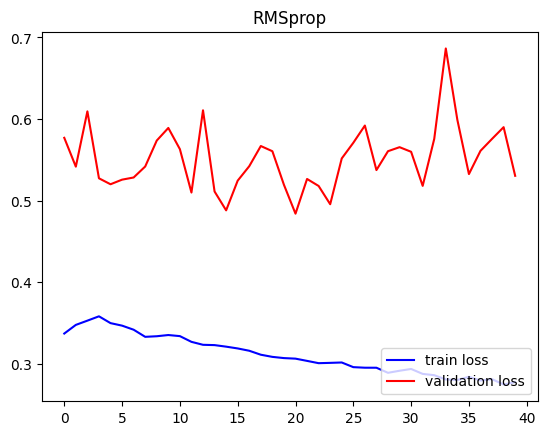

In [42]:
plt.plot(DO_hist2.history['loss'],  color= 'b',  label= 'train loss')
plt.plot(DO_hist2.history['val_loss'], color = 'r',  label = 'validation loss')
plt.legend(loc = 'lower right')
plt.title('RMSprop')

plt.show()

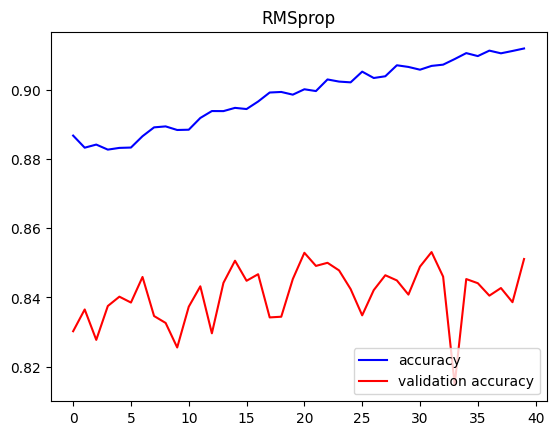

In [43]:
plt.plot(DO_hist2.history['accuracy'],  color= 'b', label = 'accuracy')
plt.plot(DO_hist2.history['val_accuracy'], color = 'r', label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.title('RMSprop')

plt.show()